In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import scipy 

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'D:/Tree_Counting/data 2/train'
test_path = 'D:/Tree_Counting/data 2/test'

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in vgg.layers:
  layer.trainable = False
  

  
folders = glob('D:/Tree_Counting/data 2/train/*')

In [7]:
# No of layers
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory( 'D:/Tree_Counting/data 2/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 30 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('D:/Tree_Counting/data 2/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 12 images belonging to 3 classes.


In [15]:

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20908\1035509065.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
1/1 [==============================] - 11s 11s/step - loss: 1.2625 - accuracy: 0.3333 - val_loss: 0.8186 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 8s 8s/step - loss: 0.8631 - accuracy: 0.6667 - val_loss: 0.0959 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 7s 7s/step - loss: 0.1027 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 8s 8s/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 7s 7s/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 7s 7s/step - loss: 0.0948 - accuracy: 0.9667 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 7s 7s/step - loss: 0.0658 - accuracy: 0.9667 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=======================

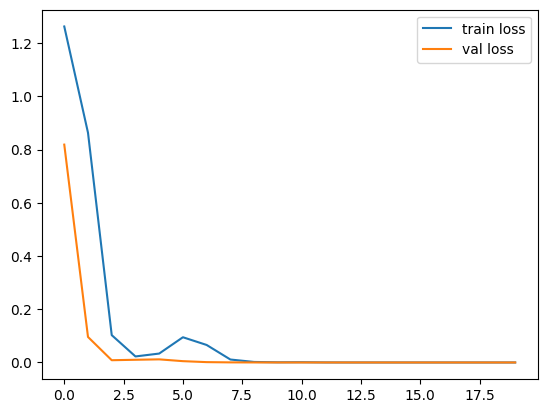

<Figure size 640x480 with 0 Axes>

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

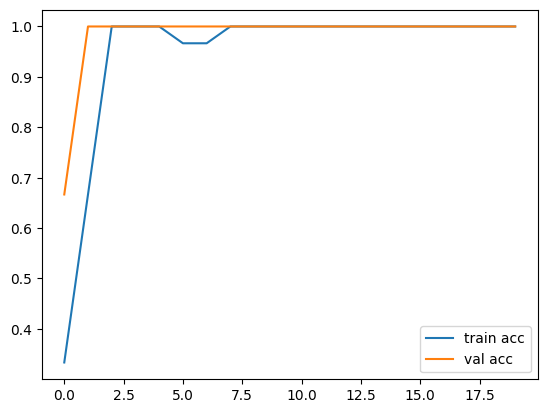

<Figure size 640x480 with 0 Axes>

In [17]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
import tensorflow as tf
from keras.models import load_model

In [19]:
# ##Saving the model 
# model.save('final_model.h5')

In [20]:
y_pred = model.predict(test_set)

1/1 [==============================] - 2s 2s/step


In [21]:
y_pred

array([[6.4820083e-10, 1.8189459e-07, 9.9999976e-01],
       [6.4820083e-10, 1.8189459e-07, 9.9999976e-01],
       [1.0000000e+00, 2.4198182e-10, 1.2438552e-12],
       [1.0000000e+00, 2.4198182e-10, 1.2438552e-12],
       [1.0000000e+00, 2.4198182e-10, 1.2438552e-12],
       [6.4820083e-10, 1.8189459e-07, 9.9999976e-01],
       [2.6306313e-07, 9.9999750e-01, 2.2198928e-06],
       [2.6306313e-07, 9.9999750e-01, 2.2198928e-06],
       [6.4820083e-10, 1.8189459e-07, 9.9999976e-01],
       [2.6306313e-07, 9.9999750e-01, 2.2198928e-06],
       [1.0000000e+00, 2.4198182e-10, 1.2438552e-12],
       [2.6306313e-07, 9.9999750e-01, 2.2198928e-06]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [15]:
# y_pred